## Stroke Prediction Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Step 1: Load the data

In [3]:
data= pd.read_csv('stroke_dataset.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# lets make a copy, so that original data is intact
data=data.copy() 
data.shape

(5110, 12)

<hr style="border:1px solid #0000FF">

### Step2: Data Cleaning 

In [5]:
data.drop_duplicates(inplace=True)
## id is not needed to predict stroke, so lets drop that
data.drop(columns='id',inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
data.shape

(5110, 11)

#### Handle Nulls

In [7]:
# null values
data.isnull().sum()
# bmi has 201 null values

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

1.0553402052962912

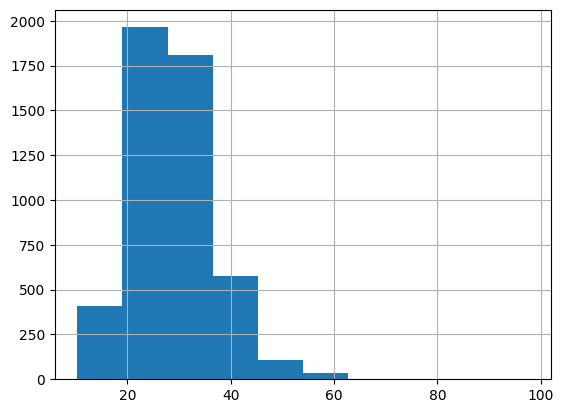

In [8]:
data.bmi.hist(bins=10)
data.bmi.skew()

In [9]:
## to avoid effect of outliers lets use median
data['bmi']=data['bmi'].fillna(data.bmi.median())
data.bmi.isnull().sum()
# nulls are removed

0

<hr style="border:1px solid #0000FF">

### Step3: EDA : Lets analyse the Data
#### # Lets check class distribution

In [10]:
print('has_stroke: ',sum(data['stroke']==1))
print('dont have stroke: ',sum(data['stroke']==0))
# doesnt have stroke has much more values than stroke, 

has_stroke:  249
dont have stroke:  4861


#### # Class imbalance !! 

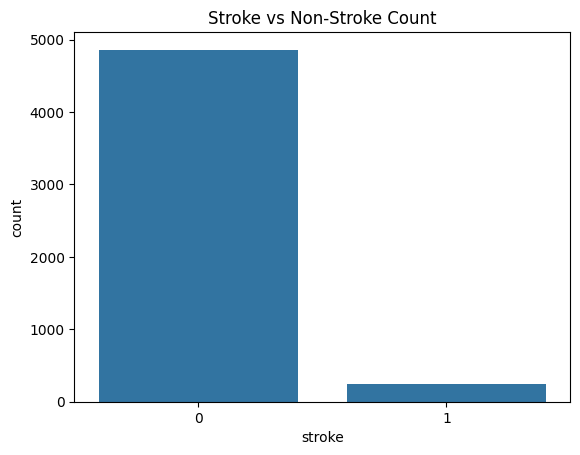

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['stroke'])
plt.title("Stroke vs Non-Stroke Count")
plt.show()

#### # Check for outliers and how numeric features are related to stroke

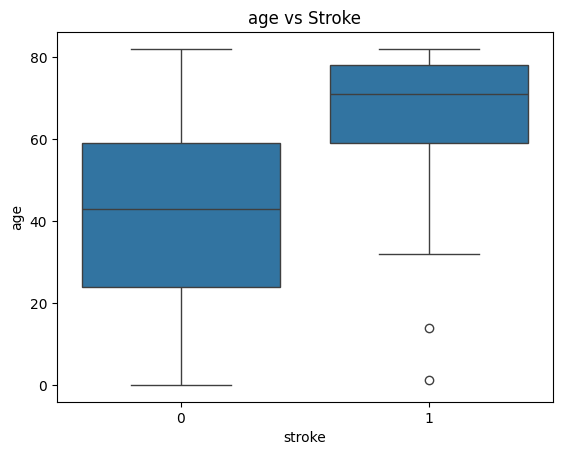

<Figure size 200x300 with 0 Axes>

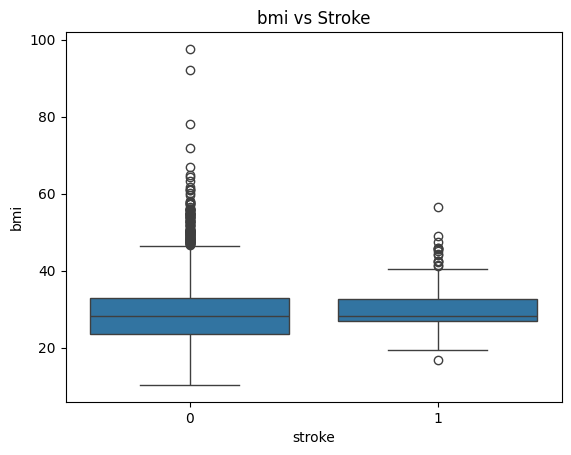

<Figure size 200x300 with 0 Axes>

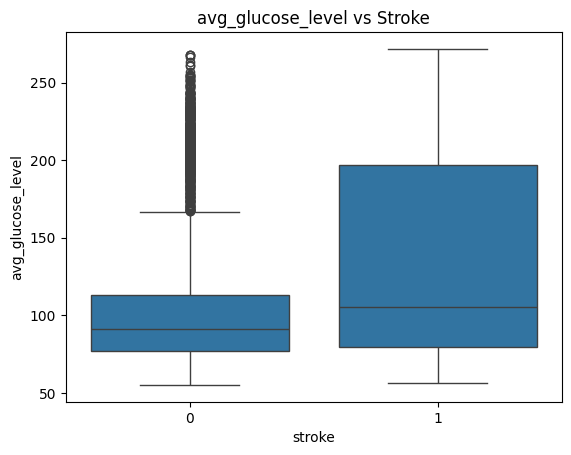

<Figure size 200x300 with 0 Axes>

In [12]:
num_features=['age','bmi','avg_glucose_level']
for feature in num_features:
    sns.boxplot(x=data.stroke,y=data[feature])
    plt.title(f'{feature} vs Stroke')
    plt.figure(figsize=(2,3))
    plt.show()


In [13]:
####  # by graph we can say that older people are more likely to get stroke,
#### # glucose_level and bmi are not much related and they have many outliers

#### # Analysing Categorical features with stroke

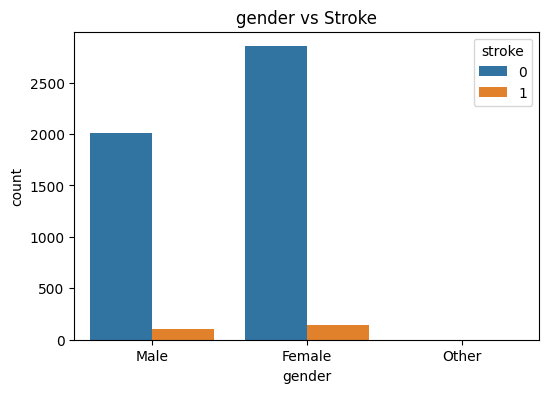

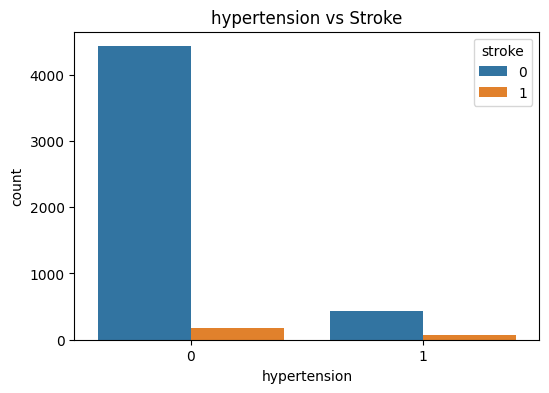

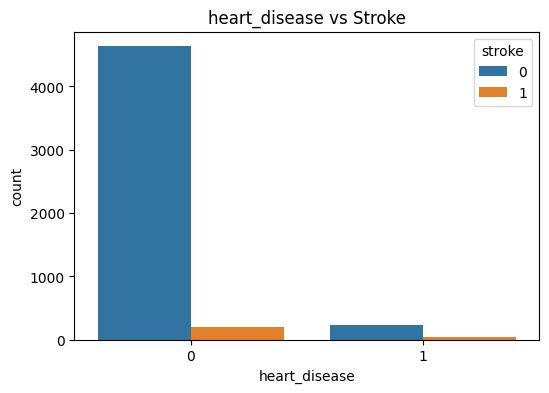

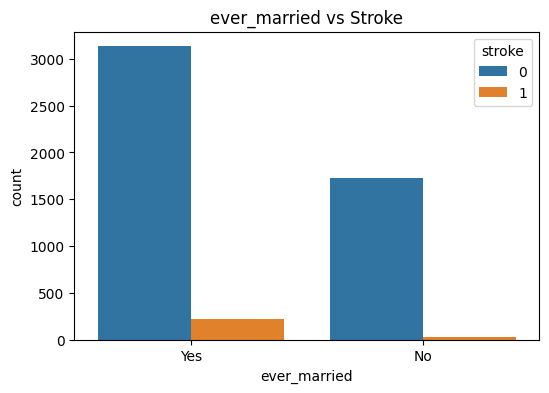

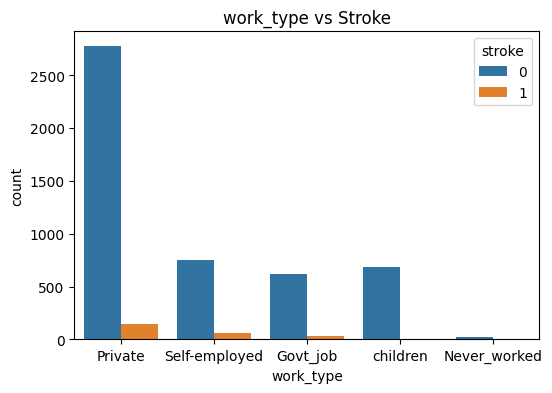

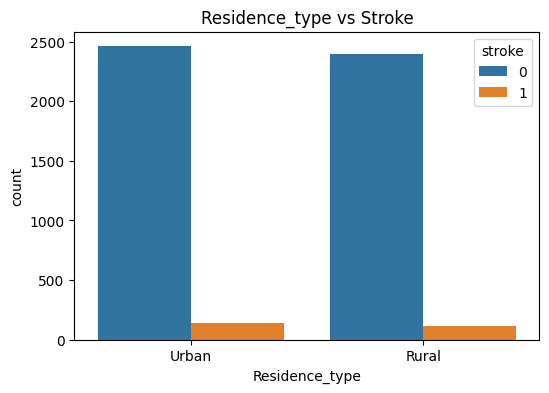

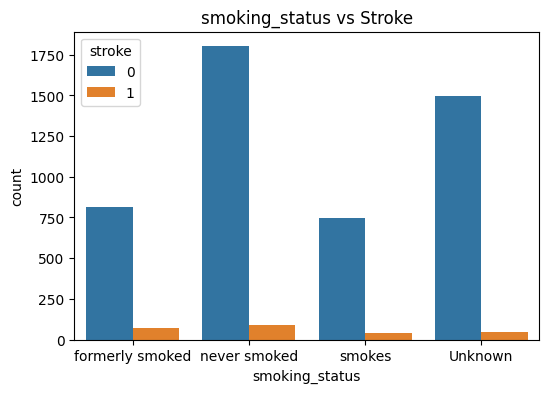

In [14]:
cat_cols=data.drop(columns=num_features+['stroke'])
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, hue="stroke")
    plt.title(f"{col} vs Stroke")
    plt.show()

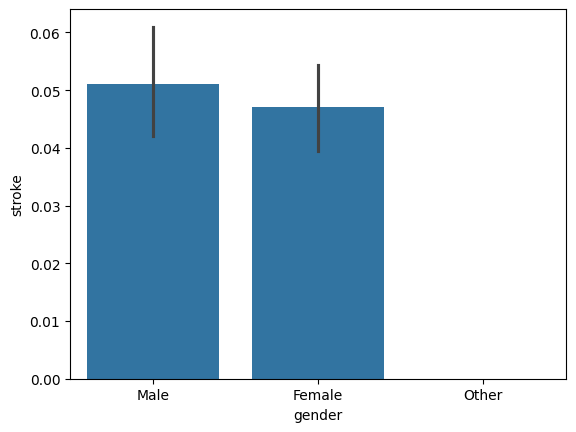

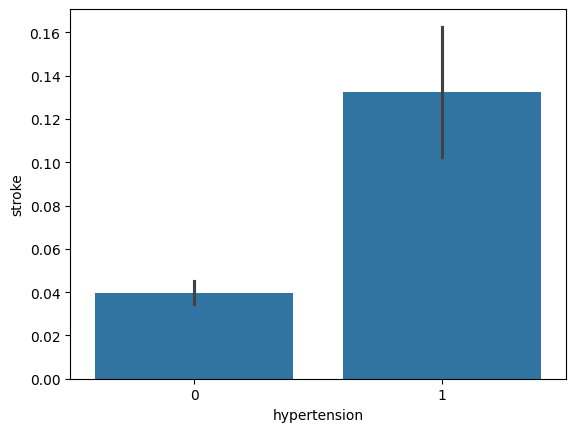

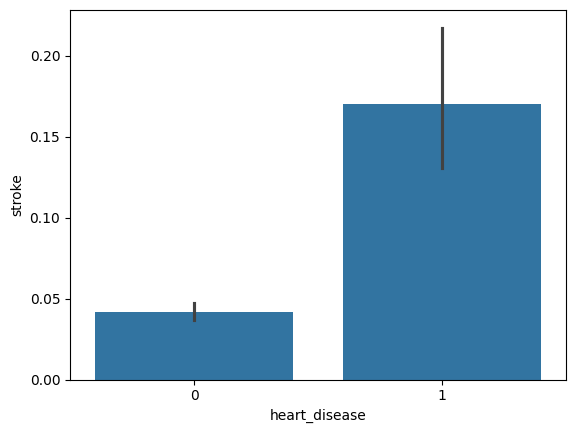

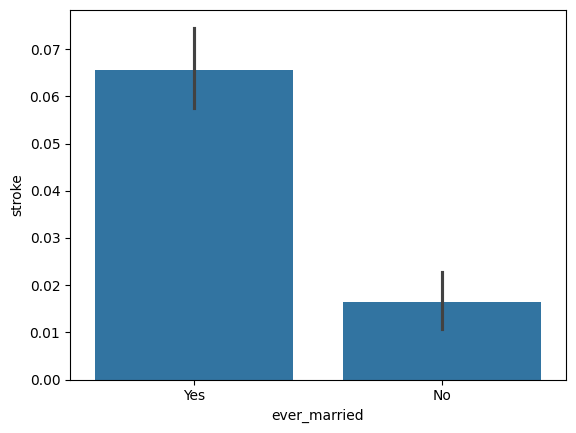

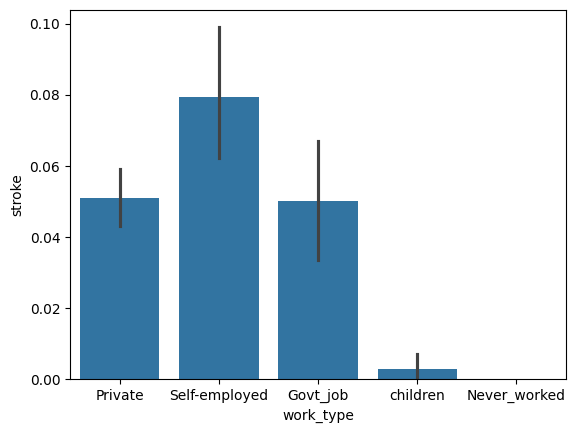

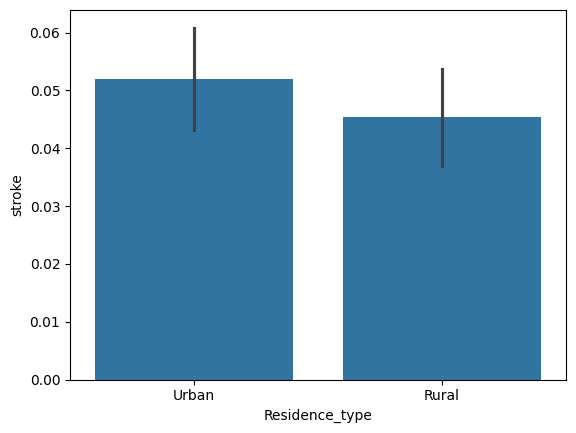

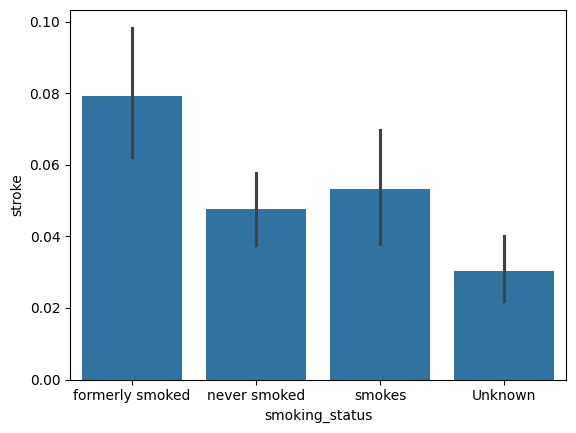

In [15]:
cat_cols=data.drop(columns=num_features+['stroke'])
for col in cat_cols:
    sns.barplot(data=data,x=col,y=data.stroke)
    plt.show()

## Step4: Preprocessing

In [16]:
for col in data.columns:
    print(col,data[col].unique())

gender ['Male' 'Female' 'Other']
age [6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e-02 1.48e+00 5.60e-01 4.80e-01 1.60e-01]
hypertension 

In [17]:
# By graph we have seen, there is only 1 other in gender, so lets remove it
data.gender.value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [18]:
### Convert column values into numeric values
## Binary features: ever_married , Residence_type,gender
data['gender']=(data['gender']=='Male').astype(int)
data['Residence_type']=(data['Residence_type']=='Urban').astype(int)
data['ever_married']=(data['ever_married']=='Yes').astype(int)
print(data['Residence_type'].value_counts())
print(data['ever_married'].value_counts())
print(data['gender'].value_counts())

Residence_type
1    2596
0    2514
Name: count, dtype: int64
ever_married
1    3353
0    1757
Name: count, dtype: int64
gender
0    2995
1    2115
Name: count, dtype: int64


In [19]:
data['smoking_status']=data['smoking_status'].replace('Unknown', 'No info')
data.smoking_status.value_counts()

smoking_status
never smoked       1892
No info            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [20]:
data['work_type']=data['work_type'].replace('children','Never_worked')
data.work_type.value_counts()

work_type
Private          2925
Self-employed     819
Never_worked      709
Govt_job          657
Name: count, dtype: int64

In [21]:
# One-hot encoding for muti Categorical
cat_cols=['work_type','smoking_status']
data=pd.get_dummies(data=data,columns=cat_cols).astype(int)
data.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_No info,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228,36,1,0,0,1,0,0,1,0,0
1,0,61,0,0,1,0,202,28,1,0,0,0,1,0,0,1,0
2,1,80,0,1,1,0,105,32,1,0,0,1,0,0,0,1,0
3,0,49,0,0,1,1,171,34,1,0,0,1,0,0,0,0,1
4,0,79,1,0,1,0,174,24,1,0,0,0,1,0,0,1,0


In [22]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'stroke',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'smoking_status_No info',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [23]:
## Initilizing input and target features
X=data.drop(columns='stroke')
y=data.stroke

### Handle Outliers

In [26]:
num_features = ['age', 'avg_glucose_level', 'bmi']
for col in num_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data[col] = np.where(data[col] > upper, upper, data[col])
    data[col] = np.where(data[col] < lower, lower, data[col])


### # Train,test,split

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [28]:
print('xtrain: ',xtrain.shape)
print('xtest: ',xtest.shape)
print('ytrain: ',ytrain.shape)
print('ytest: ',ytest.shape)

xtrain:  (4088, 16)
xtest:  (1022, 16)
ytrain:  (4088,)
ytest:  (1022,)


### # Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
# for numeric columns
num_features = ['age','avg_glucose_level', 'bmi']
scaler = StandardScaler()

# Fit on training data
xtrain[num_features] = scaler.fit_transform(xtrain[num_features])

# Transform test data
xtest[num_features] = scaler.transform(xtest[num_features])


In [30]:
## check scaling is good or not
xtrain[num_features].describe()

,age,avg_glucose_level,bmi
count,4.088000e+03,4.088000e+03,4.088000e+03
mean,1.216683e-16,-4.171484e-17,-1.499127e-16
std,1.000122e+00,1.000122e+00,1.000122e+00
min,-1.916392e+00,-1.123444e+00,-2.380939e+00
25%,-7.667732e-01,-6.372098e-01,-7.040773e-01
50%,7.333299e-02,-3.277878e-01,-5.913063e-02
75%,7.807908e-01,1.805485e-01,4.568267e-01
max,1.709329e+00,3.650496e+00,8.841134e+00


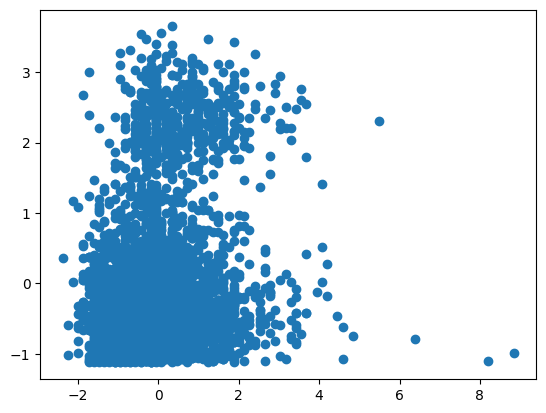

In [31]:
plt.scatter(xtrain['bmi'],xtrain['avg_glucose_level'])
plt.show()
# Range is same 

<hr style="border:1px solid #0000FF">

### # Handle imbalanced Data

In [32]:
ytrain.value_counts()

stroke
0    3889
1     199
Name: count, dtype: int64

In [ ]:
# Why is it important to solve imbalancedn: In this dataset, only 5% of patients have stroke.
# If you just train a model as it is, it might predict “No Stroke” for everyone and still get ~95% accuracy → useless in real life.
# In healthcare false negatives are risky i.e recall is priority

In [33]:
# Oversampling minority class (stroke=1) → add more positive samples.
# SMOTE (Synthetic Minority Oversampling Technique): creates synthetic new patients based on real ones.
# Good choice here
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
xtrain, ytrain = smote.fit_resample(xtrain, ytrain)

/Users/bathulasushma/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [34]:
# Now both classes are balanced
ytrain.value_counts()

stroke
0    3889
1    3889
Name: count, dtype: int64

<hr style="border:1px solid #0000FF">

## Step5: Model Building

In [ ]:
## Lets use diff models to predict data

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#from xgboost import XGBClassifier

In [36]:
models= {
    "Logistic Regression": LogisticRegression(
        max_iter=1000,class_weight='balanced',random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),       
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [38]:
# Dictionary of untuned models
results = {}

for name, model in models.items():
    print(f"Training {name}:")
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    acc = accuracy_score(ytest, ypred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(ytest, ypred))

    results[name] = acc
    print("-" * 60)

print("Accuracies of Models before tuning:",results)


Training Logistic Regression:
Accuracy: 0.8023
              precision    recall  f1-score   support

           0       0.98      0.81      0.89       972
           1       0.16      0.72      0.26        50

    accuracy                           0.80      1022
   macro avg       0.57      0.76      0.57      1022
weighted avg       0.94      0.80      0.86      1022

------------------------------------------------------------
Training KNN:
Accuracy: 0.8072
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       972
           1       0.08      0.30      0.13        50

    accuracy                           0.81      1022
   macro avg       0.52      0.57      0.51      1022
weighted avg       0.92      0.81      0.85      1022

------------------------------------------------------------
Training Decision Tree:
Accuracy: 0.8826
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       

#### Ignore Naive Bayes Model, Adaboost model

<hr style="border:1px solid #0000FF">

### Step6: HyperParameter Tuning

In [ ]:
# Logistic Regression (high recall, f1 score can be tuned)
# Gradient Boosting (balance of accuracy + recall)
# Random Forest (best accuracy, but recall needs tuning)
# SVM (recall decent, can be improved with tuned C and kernel)

#### For Logistic Regression

In [39]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(class_weight='balanced',random_state=42,max_iter=2000)

# Parameter grid
param_grid = {
    "C": [0.001,0.01, 0.1, 1, 10,40,60,100],
    "solver": ["liblinear","saga"],
    "penalty": ["l1", "l2"]
}

# Grid Search
grid_lr = GridSearchCV(lr, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_lr.fit(xtrain, ytrain)

# Best params + evaluation
print("Best Params:", grid_lr.best_params_)
print("Best CV F1 Score:", grid_lr.best_score_)

y_pred_lr = grid_lr.predict(xtest)
print("Test Accuracy:", accuracy_score(ytest, y_pred_lr))
print(classification_report(ytest, y_pred_lr))


Best Params: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best CV F1 Score: 0.8256613681075582
Test Accuracy: 0.7857142857142857
              precision    recall  f1-score   support

           0       0.98      0.79      0.87       972
           1       0.15      0.74      0.25        50

    accuracy                           0.79      1022
   macro avg       0.57      0.76      0.56      1022
weighted avg       0.94      0.79      0.84      1022



### For RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [100,200,300,500],
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_rf.fit(xtrain, ytrain)

print("Random Forest Best Params:", grid_rf.best_params_)
print("Best CV F1 Score:", grid_rf.best_score_)

y_pred_rf = grid_rf.predict(xtest)
print("Test Accuracy:", accuracy_score(ytest, y_pred_rf))
print(classification_report(ytest, y_pred_rf))


Random Forest Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best CV F1 Score: 0.9572869656208655
Test Accuracy: 0.9021526418786693
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       972
           1       0.10      0.12      0.11        50

    accuracy                           0.90      1022
   macro avg       0.53      0.53      0.53      1022
weighted avg       0.91      0.90      0.91      1022



### For Gradient Boosting

In [41]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0]
}

grid_gb = GridSearchCV(gb, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_gb.fit(xtrain, ytrain)

print("Gradient Boosting Best Params:", grid_gb.best_params_)
print("Best CV F1 Score:", grid_gb.best_score_)

y_pred_gb = grid_gb.predict(xtest)
print("Test Accuracy:", accuracy_score(ytest, y_pred_gb))
print(classification_report(ytest, y_pred_gb))


Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best CV F1 Score: 0.9664081386824636
Test Accuracy: 0.9324853228962818
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.09      0.04      0.05        50

    accuracy                           0.93      1022
   macro avg       0.52      0.51      0.51      1022
weighted avg       0.91      0.93      0.92      1022



### For SVM

In [42]:
from sklearn.svm import SVC

svm = SVC(probability=True)

param_grid = {
    "C": [0.1, 1, 10, 50],
    "kernel": ["linear", "rbf", "poly"],
    "gamma": ["scale", "auto"]
}

grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring="f1", n_jobs=-1)
grid_svm.fit(xtrain, ytrain)

print("SVM Best Params:", grid_svm.best_params_)
print("Best CV F1 Score:", grid_svm.best_score_)

y_pred_svm = grid_svm.predict(xtest)
print("Test Accuracy:", accuracy_score(ytest, y_pred_svm))
print(classification_report(ytest, y_pred_svm))


SVM Best Params: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV F1 Score: 0.9284690295648961
Test Accuracy: 0.8463796477495108
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       972
           1       0.08      0.20      0.11        50

    accuracy                           0.85      1022
   macro avg       0.52      0.54      0.51      1022
weighted avg       0.91      0.85      0.88      1022

